# Capstone Project - The Battle of the Neighborhoods (Week 2)


## Description of the problem 

#### Identifying the possibility to establish a financial advisory institution in San Jose

## Solution approach

#### Analyse the economic potential of the population and exploring the venues in each neighbourhood.

### Brief description of the data and analysis

#### The source for the San Jose data is Spatial Data Repository of NYU [2] (U.S. Neighbourhoods greenness measures and social variables). Base data contains a lot of information and for many cities of USA including San Jose. Hence, the base data is preprocessed and filtered to retrieve the relevant data of San Jose.  The data pertaining to economic indicators is inferred using a statistical representation.  Subsequently, using Four Square the data of Neighborhoods and venues of San Jose is explored. K-means clustering is used for machine learning to analyze the clusters. Finally, the economic data and venue data of neighborhood are merged to provide a comprehensive basis which will enable a potential investor to establish a financial advisory insitution in San Jose.

### Notebook overview

#### This notebook contains the code for the analysis of the economic indicators and exploration of the venues in San Jose. 

### A detailed description as applicable for each step in the notebook is provided below 

#### At the outset import the relevant libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Retrieve the base data from the Spatial Data Repository of NYU [2] (U.S. Neighbourhoods greenness measures and social variables)

In [2]:
#Get the data
!wget -q -O 'stanford-xq082nw3443-geojson.json' https://geo.nyu.edu/download/file/stanford-xq082nw3443-geojson.json
print('Data downloaded!')

Data downloaded!


#### Load the complete basis data for further filtering and analysis

In [3]:
with open('stanford-xq082nw3443-geojson.json') as json_data:
    Cities_data = json.load(json_data)

In [ ]:
#View the data... later on the output is cleared as it is huge amount of data
Cities_data

#### The important part of data required for analyis is avaiable in the "features". Hence, define a new variable to store the features data

In [5]:
Cities_data = Cities_data['features']

#### Within the 'features', the 'properties' contains the necessary information for the city. Hence view the first item for checking

In [6]:
Cities_data[0]['properties']

{'state': 'CA',
 'city': 'Long Beach',
 'name': 'Airport Area',
 'regionid': 272732,
 'shape_leng': 17308.1847929,
 'shape_area': 8359173.2354,
 'x': -118.154496304,
 'y': 33.8167,
 'region_id': 272732,
 'la_city': 0,
 'regionid_1': 272732,
 'dg_n': 0.132398,
 'dg_ninv': 0.867602,
 'dp_n': 0.161726,
 'dp_ninv': 0.838274,
 'pctpark_n': 0.077342,
 'meaneq_n': 0.0,
 'dg_mean': 321.37,
 'dp_mean': 116.38,
 'pct_park': 7.728,
 'mean_eq': 0.0,
 'youngfolks': 0.226277,
 'popdensity': 5741.323529,
 'diversity': 67.864706,
 'pc_income': 33412,
 'avg_hinc': 86903,
 'avg_hval': 437100,
 'pct_own': 0.607968,
 'pct_rent': 0.357973,
 'pct_white': 0.654763,
 'pct_hispan': 0.238231,
 'pct_black': 0.052221,
 'medage_cy': 39.370588,
 'unemprt_cy': 8.505882,
 'medhinc_cy': 73346,
 'medfinc_cy': 72176,
 'avgfinc_cy': 85057,
 'medval_cy': 413713,
 'dg_std': 200.28,
 'dp_std': 106.79,
 'centroid': '0101000020E61000002081ED32B6895DC03F66F88377E84040',
 'new_geom': None,
 'paved': 0.161726,
 'city_parks': 0.1

#### Data filtering: The data still contains a lot of attributes regarding the cities. For the analysis, we need a set of attributes namely 'City', 'Neighborhood', 'Latitude', 'Longitude', 'popdensity', 'avg_hinc' ,'pct_own','pct_rent','medage_cy','medhinc_cy','city_parks'. Hence as a next step, we transform the data with these attributes into a Pandas dataframe.

In [7]:
#Transform the data into Pandas dataframe
# define the dataframe columns
column_names = ['City', 'Neighborhood', 'Latitude', 'Longitude', 'popdensity', 'avg_hinc' ,'pct_own','pct_rent','medage_cy','medhinc_cy','city_parks'] 

# instantiate the dataframe
Allcities = pd.DataFrame(columns=column_names)

In [8]:
#View the empty dataframes
Allcities

,City,Neighborhood,Latitude,Longitude,popdensity,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks


#### Populate the dataframe with the values from the features data

In [9]:
for data in Cities_data:
    Allcities_City = data['properties']['city'] 
    Allcities_Neighborhood = data['properties']['name']
    Allcities_lat = data['properties']['y']
    Allcities_lon = data['properties']['x']
    Allcities_popdensity = data['properties']['popdensity']
    Allcities_avg_hinc = data['properties']['avg_hinc']
    Allcities_pct_own = data['properties']['pct_own']
    Allcities_pct_rent = data['properties']['pct_rent']
    Allcities_medage_cy = data['properties']['medage_cy']
    Allcities_medhinc_cy = data['properties']['medhinc_cy']
    Allcities_city_parks = data['properties']['city_parks']
    
    
    
    Allcities = Allcities.append({'City': Allcities_City,
                                   'Neighborhood': Allcities_Neighborhood,
                                   'Latitude': Allcities_lat,
                                   'Longitude': Allcities_lon,
                                   'popdensity': Allcities_popdensity,
                                   'avg_hinc': Allcities_avg_hinc,
                                   'pct_own': Allcities_pct_own,
                                   'pct_rent': Allcities_pct_rent,
                                   'medage_cy': Allcities_medage_cy,
                                   'medhinc_cy': Allcities_medhinc_cy,
                                   'city_parks': Allcities_city_parks}, ignore_index=True)

In [10]:
#Examine the head of the dataframe
Allcities.head()

,City,Neighborhood,Latitude,Longitude,popdensity,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks
0,Long Beach,Airport Area,33.8167,-118.154496,5741.323529,86903,0.607968,0.357973,39.370588,73346,0.129
1,Long Beach,Alamitos Heights,33.7738,-118.125871,7060.266667,110908,0.570474,0.380876,43.066667,83046,0.129
2,Long Beach,Belmont Heights,33.7639,-118.151191,15536.411111,84302,0.318873,0.623607,40.588889,66667,0.129
3,Long Beach,Belmont Shore,33.7589,-118.137396,13146.320000,104479,0.353005,0.584101,40.273333,83425,0.129
4,Long Beach,Bixby Area,33.8405,-118.176421,9901.688000,74772,0.514261,0.443579,36.672000,62332,0.129


In [11]:
#Check to ensure that the dataset has all the cities and boroughs/neighborhoods.
print('The dataframe has {} Cities and {} neighborhoods.'.format(
        len(Allcities['City'].unique()),
        Allcities.shape[0]
    )
)

The dataframe has 39 Cities and 3155 neighborhoods.


In [12]:
# Check for the availability of the data related to San Jose
Allcities.loc[Allcities['City'] == 'San Jose']

,City,Neighborhood,Latitude,Longitude,popdensity,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks
448,San Jose,Almaden Valley,37.2211,-121.869849,5612.600000,176918,0.734866,0.237213,41.210811,140164,0.068
449,San Jose,Alum Rock-East Foothills,37.3772,-121.825214,10173.289474,113307,0.674909,0.300745,35.323684,89187,0.068
450,San Jose,Berryessa,37.4016,-121.856383,9173.466667,130216,0.744864,0.236287,37.942424,108157,0.068
452,San Jose,Blossom Valley,37.2549,-121.843005,9977.140984,115350,0.657751,0.317510,36.403279,98611,0.068
453,San Jose,Buena Vista,37.3212,-121.916699,13386.700000,79466,0.275472,0.667481,32.340000,58664,0.068
454,San Jose,Burbank,37.3213,-121.930542,10040.090909,91458,0.370584,0.587205,35.945455,69339,0.068
455,San Jose,Cambrian Park,37.2598,-121.913999,7439.178261,132315,0.674165,0.302950,40.337681,103343,0.068
457,San Jose,Downtown,37.3405,-121.890340,12526.985714,86554,0.343653,0.603385,32.780000,63735,0.068
458,San Jose,East San Jose,37.3347,-121.825193,13127.814474,102843,0.676735,0.302644,32.343421,85678,0.068
459,San Jose,Edenvale-Seven Trees,37.2797,-121.817703,12941.859375,114389,0.674291,0.299457,32.309375,92459,0.068


#### Further filter to retrieve the data for San Jose. 

In [13]:
SanJose_data = Allcities[Allcities.City == 'San Jose'].reset_index(drop=True)

#checks for SanJose data

In [14]:
SanJose_data.loc[0,'Neighborhood']

'Almaden Valley'

In [15]:
SanJose_data

,City,Neighborhood,Latitude,Longitude,popdensity,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks
0,San Jose,Almaden Valley,37.2211,-121.869849,5612.600000,176918,0.734866,0.237213,41.210811,140164,0.068
1,San Jose,Alum Rock-East Foothills,37.3772,-121.825214,10173.289474,113307,0.674909,0.300745,35.323684,89187,0.068
2,San Jose,Berryessa,37.4016,-121.856383,9173.466667,130216,0.744864,0.236287,37.942424,108157,0.068
3,San Jose,Blossom Valley,37.2549,-121.843005,9977.140984,115350,0.657751,0.317510,36.403279,98611,0.068
4,San Jose,Buena Vista,37.3212,-121.916699,13386.700000,79466,0.275472,0.667481,32.340000,58664,0.068
5,San Jose,Burbank,37.3213,-121.930542,10040.090909,91458,0.370584,0.587205,35.945455,69339,0.068
6,San Jose,Cambrian Park,37.2598,-121.913999,7439.178261,132315,0.674165,0.302950,40.337681,103343,0.068
7,San Jose,Downtown,37.3405,-121.890340,12526.985714,86554,0.343653,0.603385,32.780000,63735,0.068
8,San Jose,East San Jose,37.3347,-121.825193,13127.814474,102843,0.676735,0.302644,32.343421,85678,0.068
9,San Jose,Edenvale-Seven Trees,37.2797,-121.817703,12941.859375,114389,0.674291,0.299457,32.309375,92459,0.068


#### CREATE A MAP of San Jose  WITH NEIGHBOURHOODS SUPERIMPOSED ON TOP - To provide a graphical view of the city and neighbourhoods using Python

In [16]:
#Get the longitude and latitude of San Jose City based on the address using an agent (ny_explorer)
address = 'San Jose, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Jose are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Jose are 37.3361905, -121.8905833.


In [17]:
# create map of San Jose using latitude and longitude values
map_SanJose = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(SanJose_data['Latitude'], SanJose_data['Longitude'],SanJose_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SanJose)  
    
map_SanJose

## The next steps are for the statistical analysis. To execute these steps, a new data frame with San Jose data is used. (the previously created dataframe will be used for merging with the Venue data later)

#### Create a new dataframe with San Jose only data

In [18]:
df_SJNhood = Allcities[Allcities.City == 'San Jose'].reset_index(drop=True)

In [19]:
df_SJNhood

,City,Neighborhood,Latitude,Longitude,popdensity,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks
0,San Jose,Almaden Valley,37.2211,-121.869849,5612.600000,176918,0.734866,0.237213,41.210811,140164,0.068
1,San Jose,Alum Rock-East Foothills,37.3772,-121.825214,10173.289474,113307,0.674909,0.300745,35.323684,89187,0.068
2,San Jose,Berryessa,37.4016,-121.856383,9173.466667,130216,0.744864,0.236287,37.942424,108157,0.068
3,San Jose,Blossom Valley,37.2549,-121.843005,9977.140984,115350,0.657751,0.317510,36.403279,98611,0.068
4,San Jose,Buena Vista,37.3212,-121.916699,13386.700000,79466,0.275472,0.667481,32.340000,58664,0.068
5,San Jose,Burbank,37.3213,-121.930542,10040.090909,91458,0.370584,0.587205,35.945455,69339,0.068
6,San Jose,Cambrian Park,37.2598,-121.913999,7439.178261,132315,0.674165,0.302950,40.337681,103343,0.068
7,San Jose,Downtown,37.3405,-121.890340,12526.985714,86554,0.343653,0.603385,32.780000,63735,0.068
8,San Jose,East San Jose,37.3347,-121.825193,13127.814474,102843,0.676735,0.302644,32.343421,85678,0.068
9,San Jose,Edenvale-Seven Trees,37.2797,-121.817703,12941.859375,114389,0.674291,0.299457,32.309375,92459,0.068


#### As seen above there are many economic indicators available. Since the economic indicators are critical for the decision to establish a financial instituion, the "average high income" for neighbourhoods is used for statistical representation and inference.

#### A bar graph would be used to provide a view of the Neighborhoods along with the average high income. Hence the other columns are dropped.

In [20]:
df_SJNhood.drop(['City', 'Latitude', 'Longitude', 'popdensity', 'pct_own', 'pct_rent', 'medage_cy','medhinc_cy','city_parks'], axis=1, inplace=True)

In [21]:
df_SJNhood.head()

,Neighborhood,avg_hinc
0,Almaden Valley,176918
1,Alum Rock-East Foothills,113307
2,Berryessa,130216
3,Blossom Valley,115350
4,Buena Vista,79466


In [22]:
#Set the Neighborhood as index to enable the creation of the bar graph£
df_SJNhood.set_index('Neighborhood', inplace=True)

In [23]:
df_SJNhood.head()

,avg_hinc
Neighborhood,
Almaden Valley,176918
Alum Rock-East Foothills,113307
Berryessa,130216
Blossom Valley,115350
Buena Vista,79466


#### Steps to create the statistical graph

In [24]:
count, bin_edges = np.histogram(df_SJNhood)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[3 1 4 4 0 4 1 0 0 1]
[79466.0 89211.2 98956.4 108701.6 118446.8 128192.0 137937.2
 147682.40000000002 157427.6 167172.8 176918.0]


In [25]:
# Importing labs
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


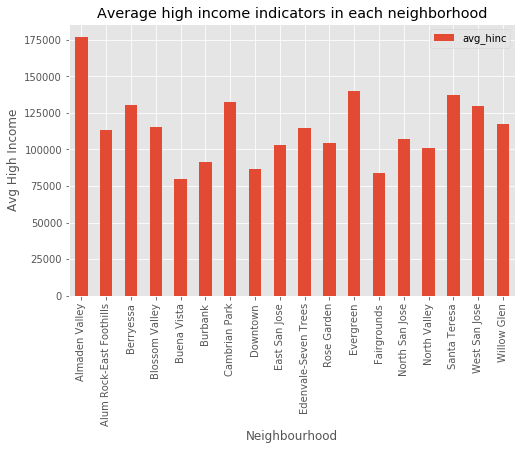

In [26]:
df_SJNhood.plot(kind='bar', figsize=(8, 5))

                   
plt.title('Average high income indicators in each neighborhood') # add a title to the histogram
plt.ylabel('Avg High Income') # add y-label
plt.xlabel('Neighbourhood') # add x-label

plt.show()

#### As seen above except for four Neighbourhoods, all the rest have population with an average high income of more than 100000 USD. This is a very strong economic indicator respectively a sizeable market potential. Hence,an incentive to establish a financial advisory institution.

#### In addition, we shall explore the neighbourhoods and venues to provide additional data basis to enable an investor for establishing a financial advisory institution.

## The next part of the Notebook is for the exploration and analysis of San Jose data using Foursquare

#### Define Foursquare Credentials and Version
####  My client id and client_secret are replaced by AAAA... 

In [ ]:
CLIENT_ID = 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' # your Foursquare ID
CLIENT_SECRET = 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [28]:
#Explore the data#SanJose_data.loc[SanJose_data.Neighborhood == 'Almaden Valley']#SanJose_data.loc[1,'Neighborhood']
SanJose_data.loc[0, 'Neighborhood']

'Almaden Valley'

In [29]:
#Get the longitudes and latitudes from the dataframe 
neighborhood_latitude = SanJose_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = SanJose_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = SanJose_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Almaden Valley are 37.2211, -121.869849336.


#### Get the top 200 venues which are in Almaden Valley within the 2000 metre radius

In [30]:
#Define a query to search for venues in Marble Hill
radius = 2000
LIMIT = 200


In [31]:
#Define the corresponding URL for explore
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UB0Q5DWG34Q0JG41SFGABZQ2Z1IAZIGXUHWTBA5AOWN3ITGD&client_secret=J1BIB11QS1TJ4WAV3NR2WADTBFVTD3MVB4YB3LORQK5SZDSO&v=20180605&ll=37.2211,-121.869849336&radius=2000&limit=200'

In [ ]:
#Send the GET results... The output is later cleared due to the size
results = requests.get(url).json()
results

In [33]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
#Clean the JSON and store in a Pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tacos Al Pastor,Mexican Restaurant,37.220333,-121.862394
1,Los Alamitos Creek Trail,Trail,37.229587,-121.865859
2,Almaden Center,Shopping Mall,37.219970,-121.861651
3,Starbucks,Coffee Shop,37.219820,-121.861752
4,Almaden Swim & Racquet Club,Pool,37.215710,-121.866221


In [35]:
#Numnber of venues 
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


### Explore Neighborhoods in San Jose
#### Let's create a function to repeat the same process to all the neighborhoods in San Jose

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called SanJose_venues.

In [37]:
SanJose_venues = getNearbyVenues(names=SanJose_data['Neighborhood'],
                                   latitudes=SanJose_data['Latitude'],
                                   longitudes=SanJose_data['Longitude']
                                  )

Almaden Valley
Alum Rock-East Foothills
Berryessa
Blossom Valley
Buena Vista
Burbank
Cambrian Park
Downtown
East San Jose
Edenvale-Seven Trees
Rose Garden
Evergreen
Fairgrounds
North San Jose
North Valley
Santa Teresa
West San Jose
Willow Glen


In [38]:
#Check the size of the resulting dataframe
print(SanJose_venues.shape)


(251, 7)


In [39]:
SanJose_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Almaden Valley,37.2211,-121.869849,Almaden Community Center,37.221499,-121.869231,Gym / Fitness Center
1,Almaden Valley,37.2211,-121.869849,Parma Park,37.221672,-121.871146,Playground
2,Almaden Valley,37.2211,-121.869849,Jakes Playlot,37.221509,-121.870844,Playground
3,Almaden Valley,37.2211,-121.869849,Boulder Ridge Golf Club Grill,37.224674,-121.866432,Restaurant
4,Alum Rock-East Foothills,37.3772,-121.825214,Antipastos By De Rose,37.380269,-121.827502,Deli / Bodega


In [40]:
# Check how many venues were returned for each Neighbourhood
SanJose_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Almaden Valley,4,4,4,4,4,4
Alum Rock-East Foothills,6,6,6,6,6,6
Berryessa,1,1,1,1,1,1
Blossom Valley,8,8,8,8,8,8
Buena Vista,41,41,41,41,41,41
Burbank,18,18,18,18,18,18
Cambrian Park,7,7,7,7,7,7
Downtown,42,42,42,42,42,42
East San Jose,3,3,3,3,3,3


In [41]:
#Check  how many unique values can be curated from the returned values
print('There are {} uniques categories.'.format(len(SanJose_venues['Venue Category'].unique())))

There are 118 uniques categories.


### The next steps analyze each Neighborhood.

In [42]:
# one hot encoding
SanJose_onehot = pd.get_dummies(SanJose_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SanJose_onehot['Neighborhood'] = SanJose_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SanJose_onehot.columns[-1]] + list(SanJose_onehot.columns[:-1])
SanJose_onehot = SanJose_onehot[fixed_columns]

SanJose_onehot.head()

,Neighborhood,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bank,Bar,Beer Garden,Big Box Store,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Circus,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,German Restaurant,Greek Restaurant,Grocery Store,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Historic Site,Home Service,Hookah Bar,Hotel,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Marijuana Dispensary,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Motorsports Shop,Music Store,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Rental Service,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sushi Restaurant,Taco Place,Thai Restaurant,Thrift / Vintage Store,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wings Joint,Yoga Studio
0,Almaden Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Almaden Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Almaden Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Almaden Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alum Rock-East Foothills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
#Check the new dataframe
SanJose_onehot.shape

(251, 119)

In [44]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
SanJose_grouped = SanJose_onehot.groupby('Neighborhood').mean().reset_index()
SanJose_grouped

,Neighborhood,Airport Terminal,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bank,Bar,Beer Garden,Big Box Store,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Circus,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Ethiopian Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,German Restaurant,Greek Restaurant,Grocery Store,Gym / Fitness Center,Gymnastics Gym,Hawaiian Restaurant,Historic Site,Home Service,Hookah Bar,Hotel,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lawyer,Light Rail Station,Liquor Store,Marijuana Dispensary,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Motorsports Shop,Music Store,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Park,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Rental Service,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sushi Restaurant,Taco Place,Thai Restaurant,Thrift / Vintage Store,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wings Joint,Yoga Studio
0,Almaden Valley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00,0.00000,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.00000,0.00000,0.000000,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.00000,0.00000,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.500000,0.00000,0.000000,0.00000,0.000000,0.00000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.00000
1,Alum Rock-East Foothills,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00,0.00000,0.000000,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.166667,0.00000,0.00000,0.000000,0.00000,0.0,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00000,0.166667,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.00000,0.00000,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.166667,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,0.000000,0.00000,0.00000,0.00000
2,Berryessa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,0.000000,0.00,0.00000,0.0

In [45]:
#Confirm the new size
SanJose_grouped.shape

(18, 119)

### Let's print each neighborhood along with the top 8 most common venues

In [46]:
num_top_venues = 8

for hood in SanJose_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SanJose_grouped[SanJose_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Almaden Valley----
                       venue  freq
0                 Playground  0.50
1       Gym / Fitness Center  0.25
2                 Restaurant  0.25
3  Middle Eastern Restaurant  0.00
4         Persian Restaurant  0.00
5      Performing Arts Venue  0.00
6                       Park  0.00
7          Other Repair Shop  0.00


----Alum Rock-East Foothills----
                  venue  freq
0         Deli / Bodega  0.17
1           Pizza Place  0.17
2  Fast Food Restaurant  0.17
3           Auto Garage  0.17
4           Video Store  0.17
5     Martial Arts Dojo  0.17
6        Nightlife Spot  0.00
7           Music Store  0.00


----Berryessa----
                        venue  freq
0  Construction & Landscaping   1.0
1            Airport Terminal   0.0
2                  Playground   0.0
3                    Pharmacy   0.0
4          Persian Restaurant   0.0
5       Performing Arts Venue   0.0
6                        Park   0.0
7           Other Repair Shop   0.0


----Blossom

#### Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
#  let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =SanJose_grouped['Neighborhood']

for ind in np.arange(SanJose_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SanJose_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Almaden Valley,Playground,Gym / Fitness Center,Restaurant,Yoga Studio,Farmers Market,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
1,Alum Rock-East Foothills,Martial Arts Dojo,Pizza Place,Video Store,Deli / Bodega,Auto Garage,Fast Food Restaurant,Dog Run,Farmers Market,Falafel Restaurant,Eye Doctor
2,Berryessa,Construction & Landscaping,Fish & Chips Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Ethiopian Restaurant
3,Blossom Valley,Food Truck,Mexican Restaurant,Convenience Store,Farmers Market,Optical Shop,Japanese Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
4,Buena Vista,Motorcycle Shop,Dessert Shop,Grocery Store,Pharmacy,Video Store,Thrift / Vintage Store,Fast Food Restaurant,Smoke Shop,Men's Store,Other Repair Shop


### 4. Cluster Neighborhoods  - K-means is used as it fits best to provide the views on neighhourhoods

In [49]:
#Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

SanJose_grouped_clustering = SanJose_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SanJose_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([2, 1, 3, 1, 1, 1, 1, 1, 4, 1], dtype=int32)

In [50]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SanJose_merged = SanJose_data

# merge SanJose_grouped with SanJose_data to add latitude/longitude for each neighborhood
SanJose_merged = SanJose_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

SanJose_merged.head() # check the last columns!

,City,Neighborhood,Latitude,Longitude,popdensity,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,San Jose,Almaden Valley,37.2211,-121.869849,5612.600000,176918,0.734866,0.237213,41.210811,140164,0.068,2,Playground,Gym / Fitness Center,Restaurant,Yoga Studio,Farmers Market,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
1,San Jose,Alum Rock-East Foothills,37.3772,-121.825214,10173.289474,113307,0.674909,0.300745,35.323684,89187,0.068,1,Martial Arts Dojo,Pizza Place,Video Store,Deli / Bodega,Auto Garage,Fast Food Restaurant,Dog Run,Farmers Market,Falafel Restaurant,Eye Doctor
2,San Jose,Berryessa,37.4016,-121.856383,9173.466667,130216,0.744864,0.236287,37.942424,108157,0.068,3,Construction & Landscaping,Fish & Chips Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Ethiopian Restaurant
3,San Jose,Blossom Valley,37.2549,-121.843005,9977.140984,115350,0.657751,0.317510,36.403279,98611,0.068,1,Food Truck,Mexican Restaurant,Convenience Store,Farmers Market,Optical Shop,Japanese Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
4,San Jose,Buena Vista,37.3212,-121.916699,13386.700000,79466,0.275472,0.667481,32.340000,58664,0.068,1,Motorcycle Shop,Dessert Shop,Grocery Store,Pharmacy,Video Store,Thrift / Vintage Store,Fast Food Restaurant,Smoke Shop,Men's Store,Other Repair Shop


In [51]:
SanJose_merged

,City,Neighborhood,Latitude,Longitude,popdensity,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,San Jose,Almaden Valley,37.2211,-121.869849,5612.600000,176918,0.734866,0.237213,41.210811,140164,0.068,2,Playground,Gym / Fitness Center,Restaurant,Yoga Studio,Farmers Market,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
1,San Jose,Alum Rock-East Foothills,37.3772,-121.825214,10173.289474,113307,0.674909,0.300745,35.323684,89187,0.068,1,Martial Arts Dojo,Pizza Place,Video Store,Deli / Bodega,Auto Garage,Fast Food Restaurant,Dog Run,Farmers Market,Falafel Restaurant,Eye Doctor
2,San Jose,Berryessa,37.4016,-121.856383,9173.466667,130216,0.744864,0.236287,37.942424,108157,0.068,3,Construction & Landscaping,Fish & Chips Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Ethiopian Restaurant
3,San Jose,Blossom Valley,37.2549,-121.843005,9977.140984,115350,0.657751,0.317510,36.403279,98611,0.068,1,Food Truck,Mexican Restaurant,Convenience Store,Farmers Market,Optical Shop,Japanese Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
4,San Jose,Buena Vista,37.3212,-121.916699,13386.700000,79466,0.275472,0.667481,32.340000,58664,0.068,1,Motorcycle Shop,Dessert Shop,Grocery Store,Pharmacy,Video Store,Thrift / Vintage Store,Fast Food Restaurant,Smoke Shop,Men's Store,Other Repair Shop
5,San Jose,Burbank,37.3213,-121.930542,10040.090909,91458,0.370584,0.587205,35.945455,69339,0.068,1,Convenience Store,Discount Store,Mexican Restaurant,Karaoke Bar,Dive Bar,Middle Eastern Restaurant,Pool,Ethiopian Restaurant,Falafel Restaurant,Korean Restaurant
6,San Jose,Cambrian Park,37.2598,-121.913999,7439.178261,132315,0.674165,0.302950,40.337681,103343,0.068,1,Big Box Store,Dance Studio,Arts & Crafts Store,Intersection,Playground,Dog Run,Sushi Restaurant,Yoga Studio,Falafel Restaurant,Eye Doctor
7,San Jose,Downtown,37.3405,-121.890340,12526.985714,86554,0.343653,0.603385,32.780000,63735,0.068,1,Mexican Restaurant,Coffee Shop,Sandwich Place,German Restaurant,Hookah Bar,Performing Arts Venue,Pub,Karaoke Bar,Caribbean Restaurant,Pizza Place
8,San Jose,East San Jose,37.3347,-121.825193,13127.814474,102843,0.676735,0.302644,32.343421,85678,0.068,4,Airport Terminal,Soccer Field,Convenience Store,Gymnastics Gym,Farmers Market,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
9,San Jose,Edenvale-Seven Trees,37.2797,-121.817703,12941.859375,114389,0.674291,0.299457,32.309375,92459,0.068,1,Playground,BBQ Joint,Convenience Store,Yoga Studio,Fast Food Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store


### **The above data provides a merged view of the Neighbourhoods, average high income along with the venues. All together are a good basis to determine the feasibility of establishing a financial advisory instituion which is the objective of this assignment**.

In [52]:
#Visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SanJose_merged['Latitude'], SanJose_merged['Longitude'], SanJose_merged['Neighborhood'], SanJose_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
#Cluster 1 - Identify the unique categories and assign labels
SanJose_merged.loc[SanJose_merged['Cluster Labels'] == 0, SanJose_merged.columns[[1] + list(range(5, SanJose_merged.shape[1]))]]

,Neighborhood,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Willow Glen,117085,0.571972,0.395732,39.108333,90779,0.068,0,Construction & Landscaping,Nightlife Spot,Garden,Historic Site,Asian Restaurant,Fish & Chips Shop,Department Store,Dessert Shop,Arts & Crafts Store,Discount Store


In [54]:
#Cluster 3
SanJose_merged.loc[SanJose_merged['Cluster Labels'] == 1, SanJose_merged.columns[[1] + list(range(5, SanJose_merged.shape[1]))]]

,Neighborhood,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alum Rock-East Foothills,113307,0.674909,0.300745,35.323684,89187,0.068,1,Martial Arts Dojo,Pizza Place,Video Store,Deli / Bodega,Auto Garage,Fast Food Restaurant,Dog Run,Farmers Market,Falafel Restaurant,Eye Doctor
3,Blossom Valley,115350,0.657751,0.317510,36.403279,98611,0.068,1,Food Truck,Mexican Restaurant,Convenience Store,Farmers Market,Optical Shop,Japanese Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
4,Buena Vista,79466,0.275472,0.667481,32.340000,58664,0.068,1,Motorcycle Shop,Dessert Shop,Grocery Store,Pharmacy,Video Store,Thrift / Vintage Store,Fast Food Restaurant,Smoke Shop,Men's Store,Other Repair Shop
5,Burbank,91458,0.370584,0.587205,35.945455,69339,0.068,1,Convenience Store,Discount Store,Mexican Restaurant,Karaoke Bar,Dive Bar,Middle Eastern Restaurant,Pool,Ethiopian Restaurant,Falafel Restaurant,Korean Restaurant
6,Cambrian Park,132315,0.674165,0.302950,40.337681,103343,0.068,1,Big Box Store,Dance Studio,Arts & Crafts Store,Intersection,Playground,Dog Run,Sushi Restaurant,Yoga Studio,Falafel Restaurant,Eye Doctor
7,Downtown,86554,0.343653,0.603385,32.780000,63735,0.068,1,Mexican Restaurant,Coffee Shop,Sandwich Place,German Restaurant,Hookah Bar,Performing Arts Venue,Pub,Karaoke Bar,Caribbean Restaurant,Pizza Place
9,Edenvale-Seven Trees,114389,0.674291,0.299457,32.309375,92459,0.068,1,Playground,BBQ Joint,Convenience Store,Yoga Studio,Fast Food Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store
10,Rose Garden,104442,0.447511,0.517272,38.103333,78196,0.068,1,Fast Food Restaurant,Garden,Pizza Place,Sandwich Place,Café,Lawyer,Fried Chicken Joint,Cosmetics Shop,Intersection,Grocery Store
11,Evergreen,140063,0.799158,0.178919,36.944186,116423,0.068,1,Dessert Shop,Italian Restaurant,Gymnastics Gym,Fast Food Restaurant,Deli / Bodega,Pharmacy,Pizza Place,Playground,Coffee Shop,Chinese Restaurant
12,Fairgrounds,83621,0.480870,0.485012,31.651163,65232,0.068,1,Fast Food Restaurant,BBQ Joint,Shipping Store,Clothing Store,Salon / Barbershop,Sandwich Place,Casino,Circus,Food Truck,Mexican Restaurant


In [55]:
#Cluster 3
SanJose_merged.loc[SanJose_merged['Cluster Labels'] == 2, SanJose_merged.columns[[1] + list(range(5, SanJose_merged.shape[1]))]]

,Neighborhood,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Almaden Valley,176918,0.734866,0.237213,41.210811,140164,0.068,2,Playground,Gym / Fitness Center,Restaurant,Yoga Studio,Farmers Market,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop


In [56]:
#Cluster 4
SanJose_merged.loc[SanJose_merged['Cluster Labels'] == 3, SanJose_merged.columns[[1] + list(range(5, SanJose_merged.shape[1]))]]

,Neighborhood,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Berryessa,130216,0.744864,0.236287,37.942424,108157,0.068,3,Construction & Landscaping,Fish & Chips Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Ethiopian Restaurant


In [57]:
#cluster 5
SanJose_merged.loc[SanJose_merged['Cluster Labels'] == 4, SanJose_merged.columns[[1] + list(range(5, SanJose_merged.shape[1]))]]

,Neighborhood,avg_hinc,pct_own,pct_rent,medage_cy,medhinc_cy,city_parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,East San Jose,102843,0.676735,0.302644,32.343421,85678,0.068,4,Airport Terminal,Soccer Field,Convenience Store,Gymnastics Gym,Farmers Market,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
